In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import openturns as ot
import pandas as pd 
from copy import copy
import numpy as np 
import os
import re

In [2]:
path = './meta_analysis_results'
metaAnalysisPaths = os.listdir(path)

In [3]:
analysisDataframes = []
for i in range(len(metaAnalysisPaths)):
    sample = ot.Sample_ImportFromCSVFile(os.path.join(path,metaAnalysisPaths[i]))
    df = pd.DataFrame.from_records(sample, columns=sample.getDescription())
    analysisDataframes.append(df)

In [4]:
lhs_params = ['young','scaleYoung','diam','scaleDiam','forcePos','forceNorm', 'nu']
size_lhs = len(metaAnalysisPaths)
lhs_doe = np.zeros((size_lhs, 7))
for i in range(size_lhs):
    lhs_doe[i,...]= re.findall(r"[-+]?\d*\.\d+|\d+", metaAnalysisPaths[i])
lhs_doe_DF = pd.DataFrame.from_records(lhs_doe, columns=lhs_params)

In [5]:
realModel = []
LHS25 = []
LHS50 = []
LHS100 = []
for p in range(len(analysisDataframes)):
    realModel.append(analysisDataframes[p].loc[0])
    LHS25.append(analysisDataframes[p].loc[1])
    LHS50.append(analysisDataframes[p].loc[2])
    LHS100.append(analysisDataframes[p].loc[3])

realModel = pd.DataFrame(realModel)
LHS25 = pd.DataFrame(LHS25)
LHS50 = pd.DataFrame(LHS50)
LHS100 = pd.DataFrame(LHS100)  

realModel.reset_index(inplace=True, drop=True)
LHS25.reset_index(inplace=True, drop=True)
LHS50.reset_index(inplace=True, drop=True)
LHS100.reset_index(inplace=True, drop=True)

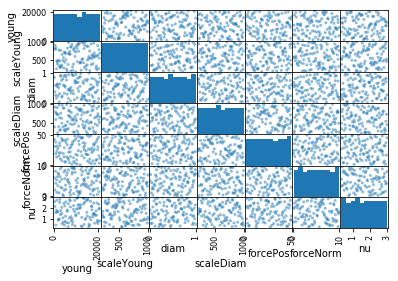

In [6]:
lhs_doe_DF
pd.plotting.scatter_matrix(lhs_doe_DF)
plt.show()

In [27]:
analysisDataframes[50]

,meta,N_LHS,size,kl_dimension,N_KL_Young,N_KL_Diam,R2,SI_E,SI_E_lb,SI_E_ub,SI_D,SI_D_lb,SI_D_ub,SI_FP,SI_FP_lb,SI_FP_ub,SI_FN,SI_FN_lb,SI_FN_ub
0,0.0,-1.0,1000.0,12.0,6.0,4.0,-1.000000,-0.008710,-0.075820,0.073600,0.953770,0.947020,0.959880,-0.025800,-0.095030,0.058820,-0.013900,-0.079280,0.066000
1,1.0,25.0,50000.0,12.0,6.0,4.0,0.876467,0.015717,0.006664,0.025558,0.953754,0.953003,0.954686,-0.003289,-0.012209,0.005898,0.010351,0.001226,0.020001
2,1.0,50.0,50000.0,12.0,6.0,4.0,0.876467,0.007973,-0.000475,0.015625,0.969929,0.969222,0.970742,-0.004780,-0.013504,0.003135,0.008116,-0.000374,0.016100
3,1.0,100.0,50000.0,12.0,6.0,4.0,0.876467,0.011462,-0.000193,0.021011,0.965045,0.964145,0.965946,-0.005437,-0.017159,0.003851,0.008725,-0.003001,0.018656


In [8]:
lhs_doe_DF

,young,scaleYoung,diam,scaleDiam,forcePos,forceNorm,nu
0,9640.0,609.0,0.6588,669.0,3.879,7.907,0.416
1,14708.0,256.0,0.0962,260.0,23.808,3.942,2.675
2,15282.0,514.0,0.7901,202.0,6.884,7.575,2.852
3,2211.0,779.0,0.5102,392.0,15.049,7.311,1.002
4,6141.0,833.0,0.0108,528.0,43.035,5.133,1.850
...,...,...,...,...,...,...,...
95,16781.0,943.0,0.6094,523.0,49.397,8.986,0.973
96,12819.0,535.0,0.2010,799.0,45.560,9.708,0.358
97,12217.0,462.0,0.9878,600.0,22.733,8.821,2.306
98,13943.0,910.0,0.1248,347.0,31.958,5.014,2.878


In [9]:
test = copy(lhs_doe_DF)
test['kl_dimension'] = pd.Series(realModel['kl_dimension'])
test['SI_E'] = pd.Series(realModel['SI_E'])
test['SI_D'] = pd.Series(realModel['SI_D'])
test['SI_FP'] = pd.Series(realModel['SI_FP'])
test['SI_FN'] = pd.Series(realModel['SI_FN'])

(12, 12)


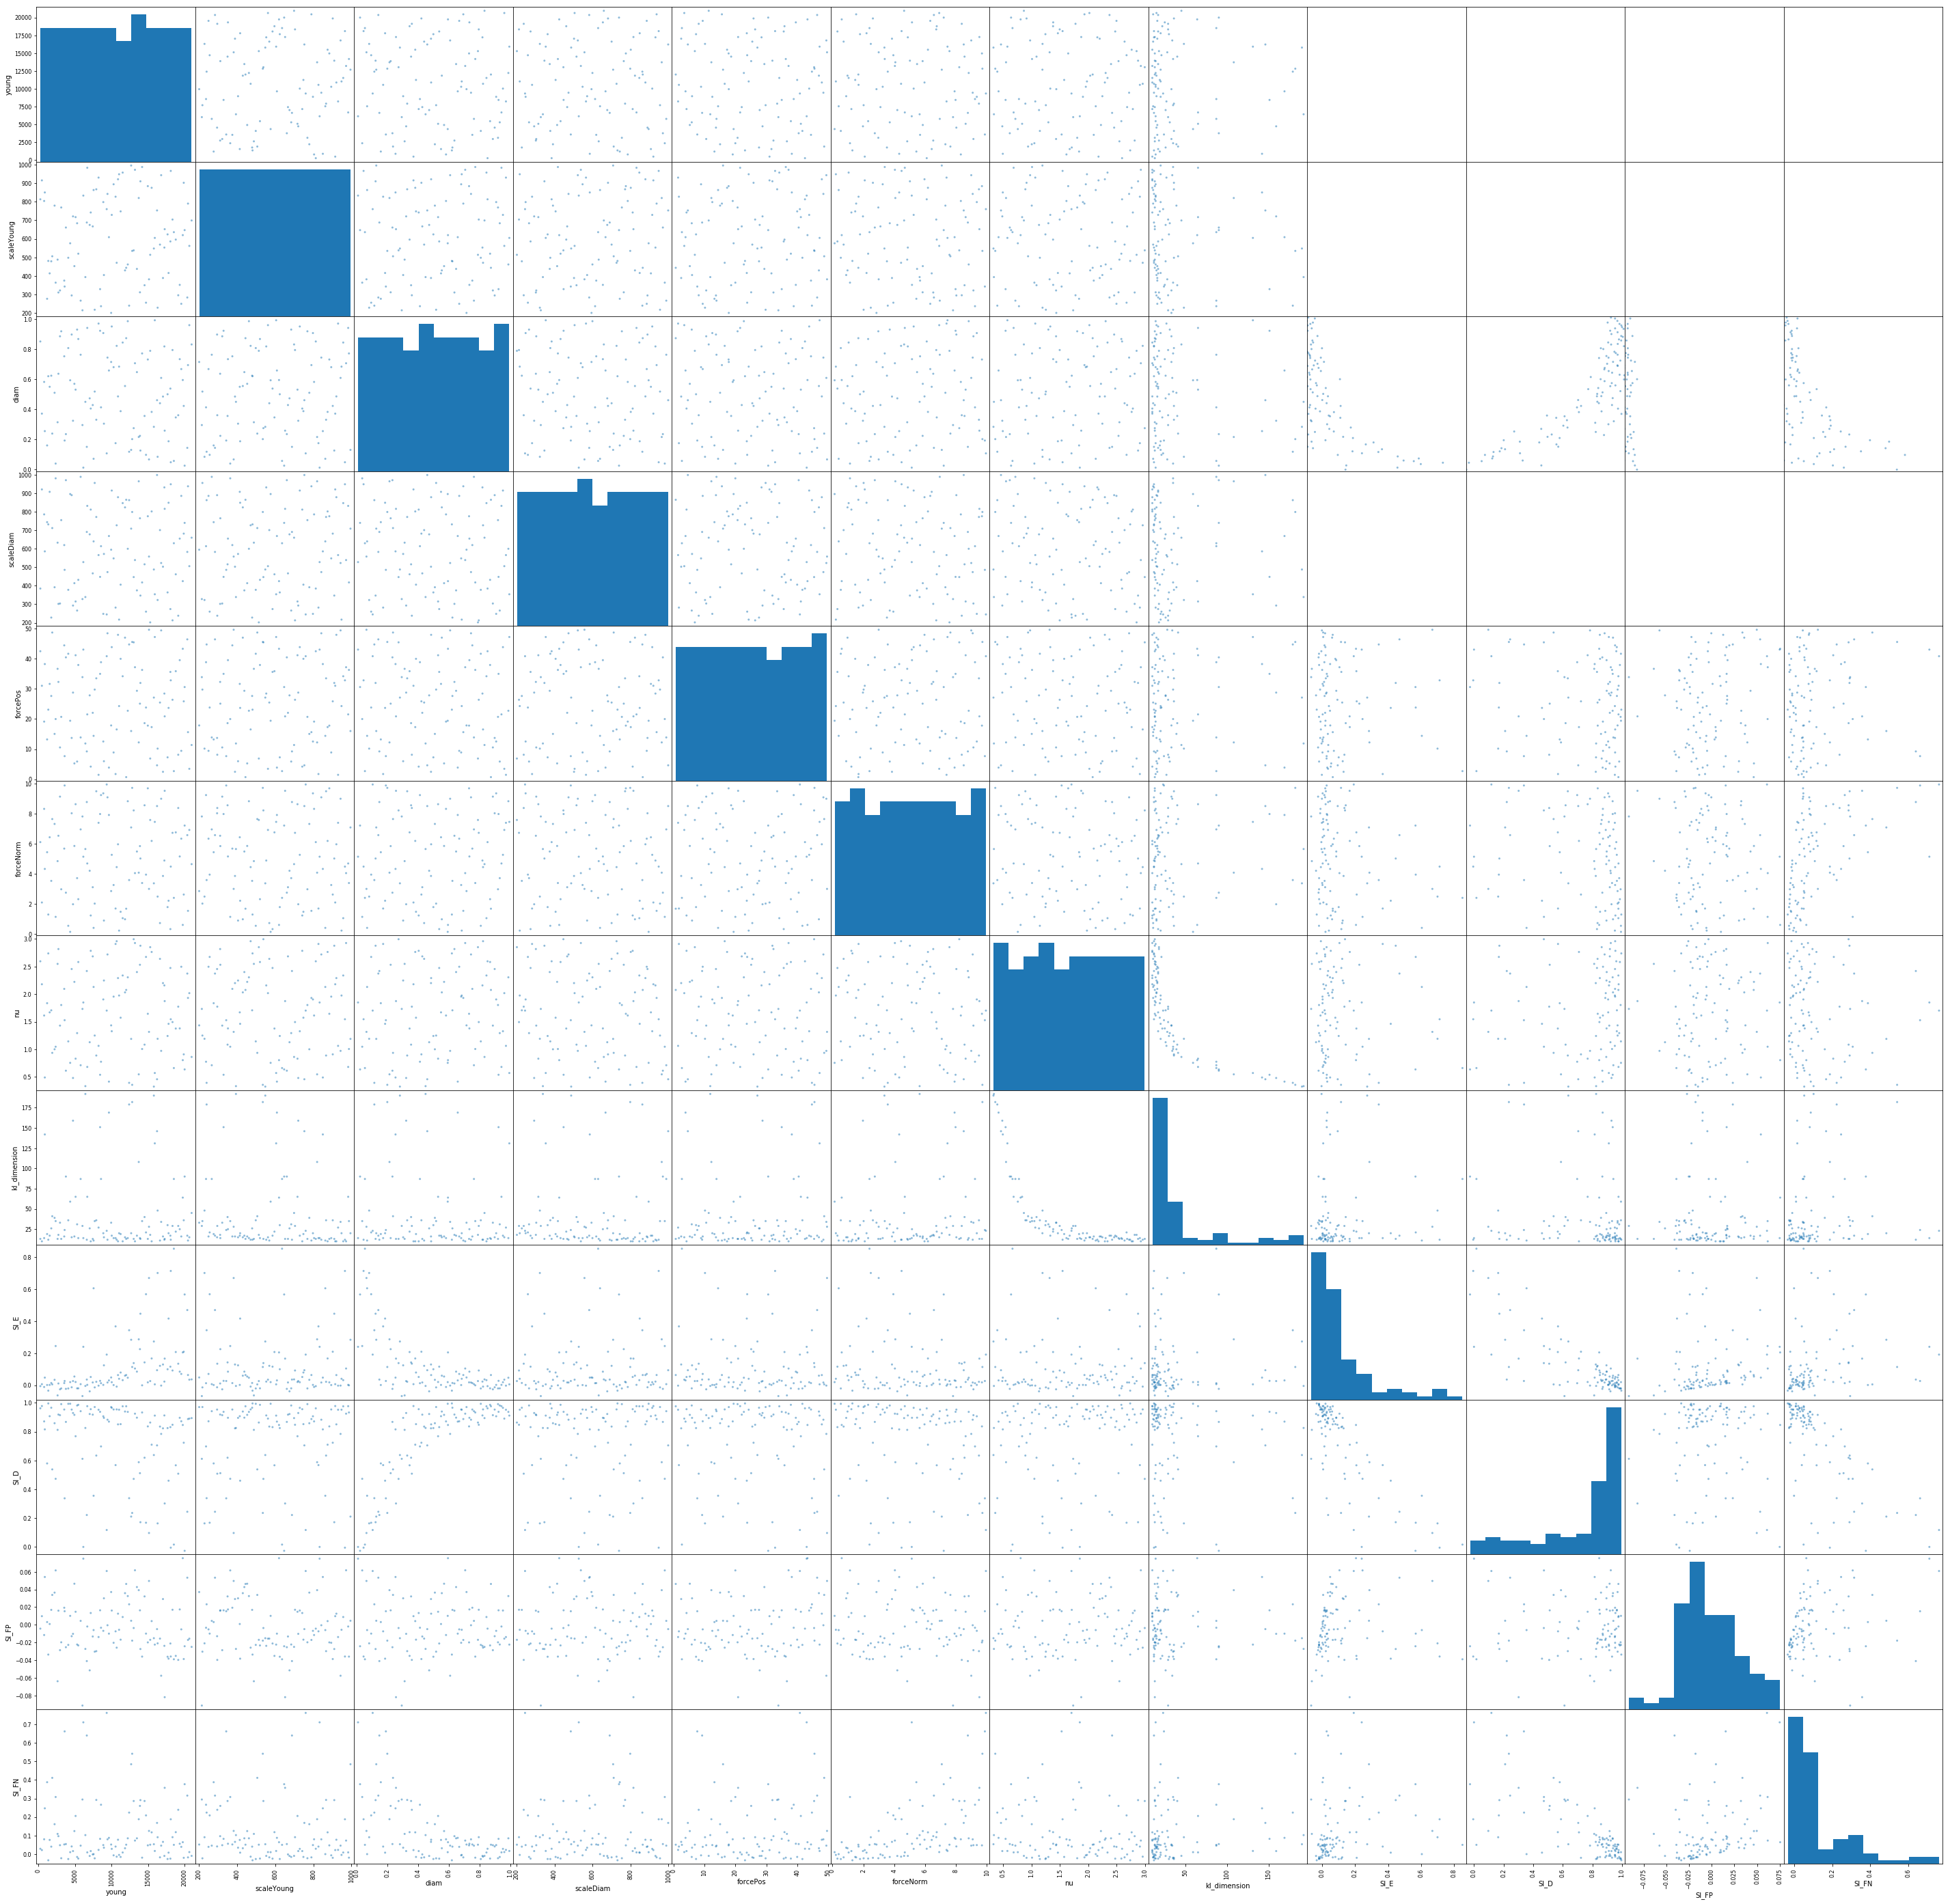

In [28]:
scatter = pd.plotting.scatter_matrix(test)
print(scatter.shape)
for i in range(scatter.shape[0]):
    for j in range(scatter.shape[1]):
        if i < 4 and j > 7 :
            scatter[i,j].set_xlim(0.0,1.0)
            scatter[i,j].set_ylim(0.0,1.0)
plt.rcParams["figure.figsize"] = (50,50)
plt.savefig('/home/motherloadubu/Documents/project_PHIMECA/spsa/Rapport_Latex/scatter_matrix2.png')
plt.show()

In [24]:
LHS25Scatter = copy(lhs_doe_DF)
LHS25Scatter['kl_dimension'] = pd.Series(LHS25['kl_dimension'])
LHS25Scatter['SI_E'] = pd.Series(LHS25['SI_E'])
LHS25Scatter['SI_D'] = pd.Series(LHS25['SI_D'])
LHS25Scatter['SI_FP'] = pd.Series(LHS25['SI_FP'])
LHS25Scatter['SI_FN'] = pd.Series(LHS25['SI_FN'])
LHS25Scatter['R2'] = pd.Series(LHS25['R2'])

LHS50Scatter = copy(lhs_doe_DF)
LHS50Scatter['kl_dimension'] = pd.Series(LHS50['kl_dimension'])
LHS50Scatter['SI_E'] = pd.Series(LHS50['SI_E'])
LHS50Scatter['SI_D'] = pd.Series(LHS50['SI_D'])
LHS50Scatter['SI_FP'] = pd.Series(LHS50['SI_FP'])
LHS50Scatter['SI_FN'] = pd.Series(LHS50['SI_FN'])
LHS50Scatter['R2'] = pd.Series(LHS50['R2'])

LHS100Scatter = copy(lhs_doe_DF)
LHS100Scatter['kl_dimension'] = pd.Series(LHS100['kl_dimension'])
LHS100Scatter['SI_E'] = pd.Series(LHS100['SI_E'])
LHS100Scatter['SI_D'] = pd.Series(LHS100['SI_D'])
LHS100Scatter['SI_FP'] = pd.Series(LHS100['SI_FP'])
LHS100Scatter['SI_FN'] = pd.Series(LHS100['SI_FN'])
LHS100Scatter['R2'] = pd.Series(LHS100['R2'])

(12, 12)


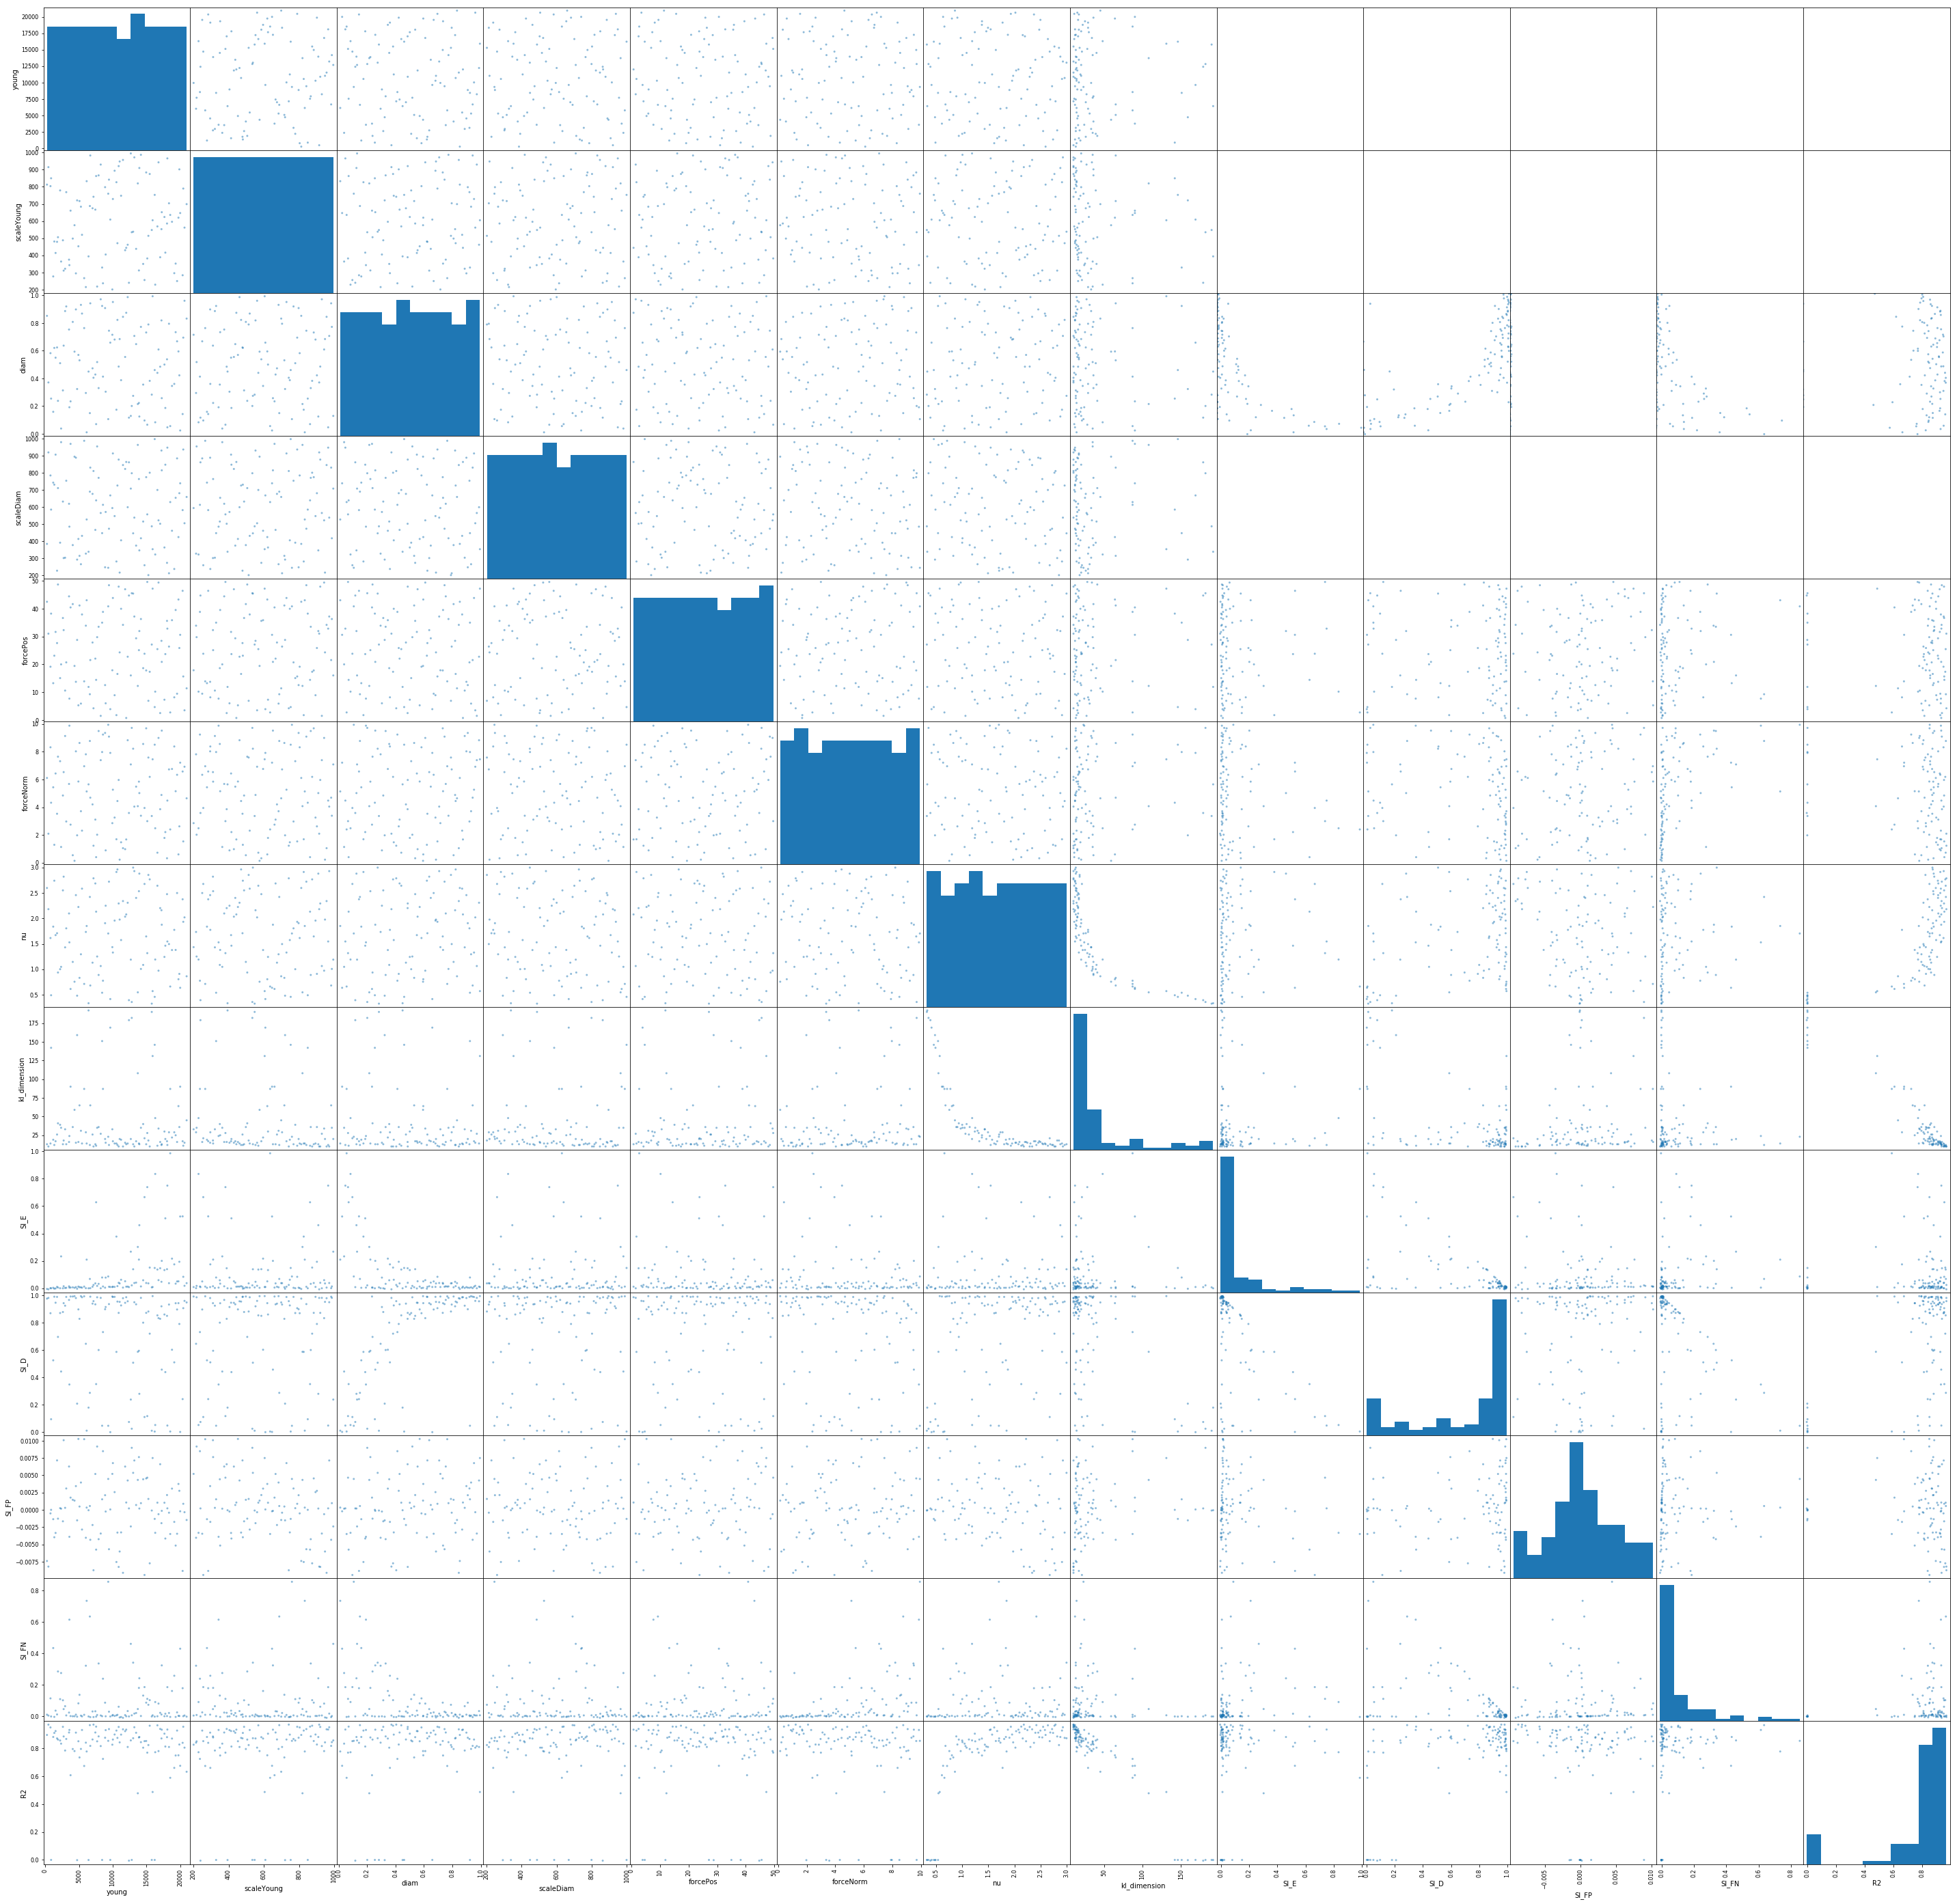

In [12]:
scatterLHS25 = pd.plotting.scatter_matrix(LHS25Scatter)
print(scatter.shape)
for i in range(scatterLHS25.shape[0]):
    for j in range(scatterLHS25.shape[1]):
        if i < 4 and j > 7 :
            scatterLHS25[i,j].set_xlim(0.0,1.0)
            scatterLHS25[i,j].set_ylim(0.0,1.0)
plt.rcParams["figure.figsize"] = (50,50)
plt.savefig('/home/motherloadubu/Pictures/scatter_matrix25.png')
plt.show()

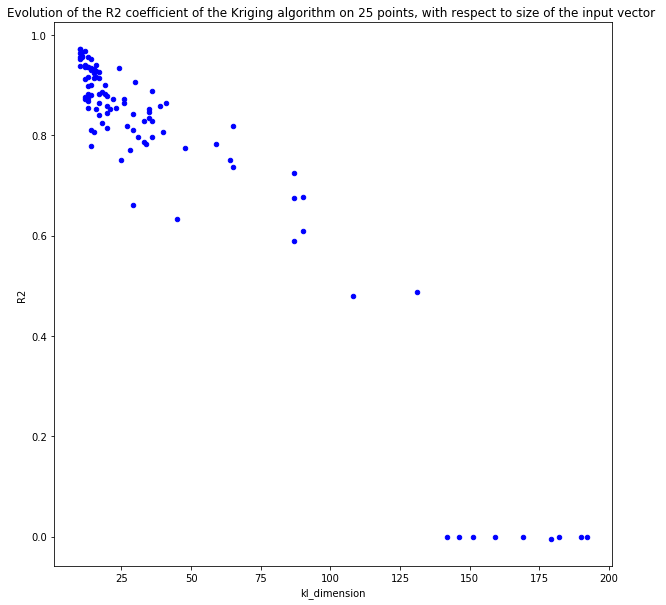

In [23]:
LHS25Scatter.plot('kl_dimension','R2',kind='scatter',  marker='o', c='b',s=20, figsize = (10,10),
                 title = 'Evolution of the R2 coefficient of the Kriging algorithm on 25 points, with respect to size of the input vector ')

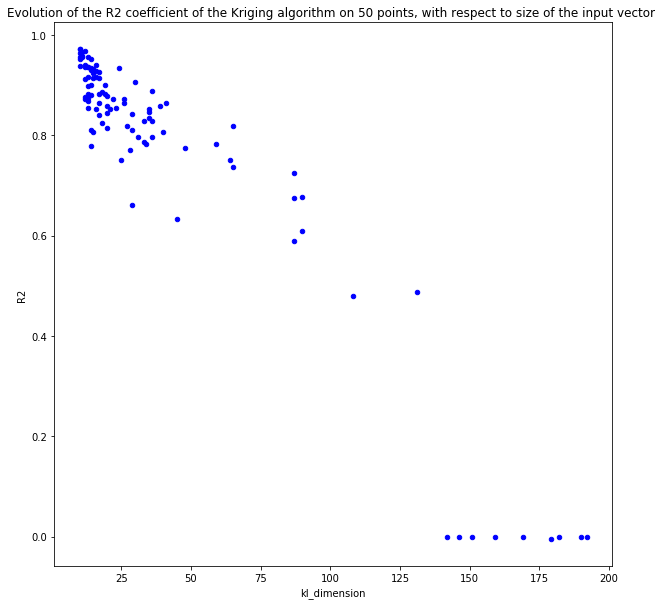

In [25]:
LHS50Scatter.plot('kl_dimension','R2',kind='scatter',  marker='o', c='b',s=20, figsize = (10,10),
                 title = 'Evolution of the R2 coefficient of the Kriging algorithm on 50 points, with respect to size of the input vector ')

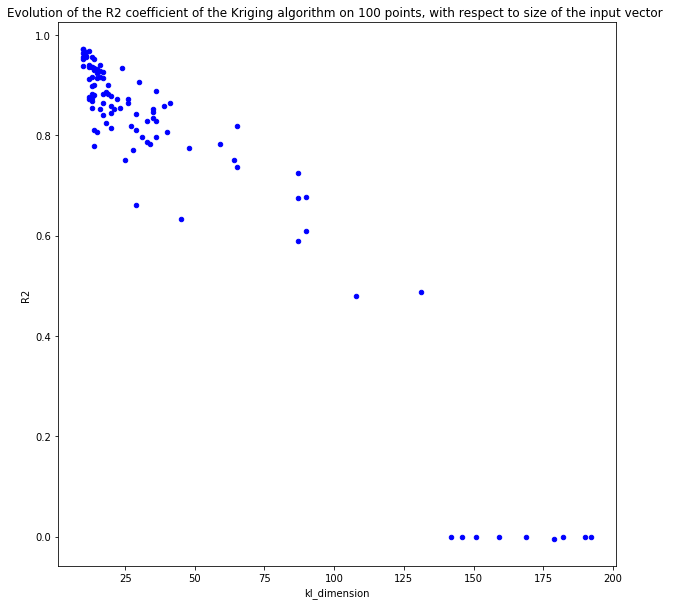

In [26]:
LHS100Scatter.plot('kl_dimension','R2',kind='scatter',  marker='o', c='b',s=20, figsize = (10,10),
                 title = 'Evolution of the R2 coefficient of the Kriging algorithm on 100 points, with respect to size of the input vector ')